### prepDataForCollegeMap
documentation: https://educationdata.urban.org/documentation/colleges.html#nhgis-geographic-variables-2010-census-geographies

In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
from shapely.geometry import Point

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
geo = pd.read_csv('data/stag_college_geo.csv')
dire = pd.read_csv('data/stag_college_info.csv',low_memory=False)
adm = pd.read_csv('data/stag_college_admissions.csv')
req = pd.read_csv('data/stag_college_admissions_req.csv')
comp = pd.read_csv('data/stag_college_completers.csv')
aid = pd.read_csv('data/stag_college_student_info.csv')

### check geo df

In [3]:
geo.columns

Index(['census_region', 'census_division', 'class_code', 'fips',
       'state_fips_geo', 'year', 'unitid', 'opeid', 'inst_name', 'address',
       'state_abbr', 'zip', 'county_fips', 'county_name', 'geo_longitude',
       'geo_latitude', 'geocode_accuracy', 'geocode_accuracy_detailed',
       'county_fips_geo', 'tract', 'block_group', 'puma', 'geoid_block',
       'msa_cmsa', 'place_fips', 'geoid_place', 'place_name', 'upper_chamber',
       'state_leg_district_upper', 'upper_chamber_name', 'lower_chamber',
       'state_leg_district_lower', 'lower_chamber_name'],
      dtype='object')

In [4]:
geo.drop(columns=['census_region', 'census_division', 'class_code', 'fips', 'state_fips_geo', 'year',
                  'county_fips', 'geocode_accuracy', 'geocode_accuracy_detailed','county_fips_geo', 'tract',
                  'block_group', 'puma', 'geoid_block','msa_cmsa', 'place_fips', 'geoid_place', 'place_name',
                  'upper_chamber','state_leg_district_upper', 'upper_chamber_name', 'lower_chamber',
                  'state_leg_district_lower', 'lower_chamber_name'], inplace=True)

In [5]:
geo.head()

,unitid,opeid,inst_name,address,state_abbr,zip,county_name,geo_longitude,geo_latitude
0,100654,00100200,Alabama A & M University,4900 Meridian Street,AL,35762,Madison County,-86.5723,34.7838
1,100663,00105200,University of Alabama at Birmingham,Administration Bldg Suite 1070,AL,35294-0110,Jefferson County,-86.8121,33.5059
2,100690,02503400,Amridge University,1200 Taylor Rd,AL,36117-3553,Montgomery County,-86.1715,32.3640
3,100706,00105500,University of Alabama in Huntsville,301 Sparkman Dr,AL,35899,Madison County,-86.6440,34.7235
4,100724,00100500,Alabama State University,915 S Jackson Street,AL,36104-0271,Montgomery County,-86.2961,32.3660


In [6]:
len(geo)

7144

In [7]:
len(geo.unitid.unique())

7144

### college info

In [8]:
dire.columns

Index(['year', 'fips', 'unitid', 'inst_name', 'address', 'state_abbr', 'zip',
       'phone_number', 'city', 'county_name', 'offering_highest_level',
       'region', 'inst_control', 'institution_level', 'sector',
       'chief_admin_name', 'chief_admin_title', 'hbcu',
       'primarily_postsecondary', 'hospital', 'medical_degree',
       'tribal_college', 'ein', 'urban_centric_locale', 'opeid',
       'offering_highest_degree', 'currently_active_ipeds', 'date_closed',
       'duns', 'title_iv_indicator', 'offering_undergrad', 'offering_grad',
       'newid', 'year_deleted', 'url_school', 'degree_granting', 'open_public',
       'postsec_public_active', 'postsec_public_active_title_iv',
       'inst_system_flag', 'inst_system_name', 'reporting_method',
       'inst_category', 'land_grant', 'inst_size', 'inst_alias', 'url_fin_aid',
       'url_application', 'cbsa', 'cbsa_type', 'csa', 'necta',
       'comparison_group', 'longitude', 'latitude', 'county_fips',
       'congress_district_i

In [9]:
dire.drop(columns=['fips', 'inst_name', 'address', 'state_abbr', 'zip',
                   'phone_number', 'city', 'county_name', 
                   'region', 'inst_control', 'institution_level', 
                   'chief_admin_name', 'chief_admin_title', 
                   'primarily_postsecondary', 'hospital', 'medical_degree',
                   'tribal_college', 'ein','offering_highest_level',
                   'offering_highest_degree', 'currently_active_ipeds', 'date_closed',
                   'duns', 'title_iv_indicator', 'offering_undergrad', 'offering_grad',
                   'newid', 'year_deleted', 'url_school', 'degree_granting', 'open_public',
                   'postsec_public_active', 'postsec_public_active_title_iv',
                   'inst_system_flag', 'inst_system_name', 'reporting_method',
                   'inst_category','inst_alias', 'url_fin_aid',
                   'cbsa', 'cbsa_type', 'csa', 'necta',
                   'comparison_group', 'longitude', 'latitude', 'county_fips',
                   'congress_district_id', 'cc_basic_2010', 'cc_instruc_undergrad_2010',
                   'cc_instruc_grad_2010', 'cc_undergrad_2010', 'cc_enroll_2010',
                   'cc_size_setting_2010', 'cc_basic_2000', 'url_netprice',
                   'comparison_group_custom', 'url_veterans', 'url_athletes',
                   'cc_basic_2015', 'cc_instruc_undergrad_2015', 'cc_instruc_grad_2015',
                   'cc_undergrad_2015', 'cc_enroll_2015', 'cc_size_setting_2015',
                   'url_disability_services', 'inst_status'], inplace=True)

In [10]:
dcols = ['sector', 'hbcu', 'urban_centric_locale', 'land_grant', 'inst_size', 'url_application']

In [11]:
dire[dcols] = dire[dcols].replace({-1:np.nan, -2:np.nan, -3:np.nan})

In [12]:
dire['sector'] = dire['sector'].replace({0:"Administrative unit",
                                         1:"Public, four-year or above",
                                         2:"Private not-for-profit, four-year or above",
                                         3:"Private for-profit, four-year or above", 
                                         4:"Public, two-year", 
                                         5:"Private not-for-profit, two-year", 
                                         6:"Private for-profit, two-year", 
                                         7:"Public, less-than two-year", 
                                         8:"Private not-for-profit, less-than-two-year", 
                                         9:"Private for-profit, less-than-two-year", 
                                        np.nan:"Unreported"})

In [13]:
dire['hbcu'] = dire['hbcu'].replace({0:"No", 1:"Yes"})

In [14]:
dire['urban_centric_locale']=dire['urban_centric_locale'].replace({1:"Large city", 
                                                                  2:"Midsize city", 
                                                                  3:"Urban fringe of large city", 
                                                                  4:"Urban fringe of midsize city", 
                                                                  5:"Large town", 
                                                                  6:"Small town", 
                                                                  7:"Rural", 
                                                                  8:"Rural", 
                                                                  9:"Not assigned", 
                                                                  11:"Large city", 
                                                                  12:"Midsize city",
                                                                  13:"Small city",
                                                                  21:"Suburb",
                                                                  22:"Suburb",
                                                                  23:"Suburb",
                                                                  31:"Town",
                                                                  32:"Town", 
                                                                  33:"Town",
                                                                  41:"Rural",
                                                                  42:"Rural",
                                                                  43:"Rural"})

In [15]:
dire['land_grant'] = dire['land_grant'].replace({0:"No", 1:"Yes"})

In [16]:
dire['inst_size'] = dire['inst_size'].replace({1:"Under 1,000", 2:"1,000–4,999", 3:"5,000–9,999", 
                                               4:"10,000–19,999", 5:"20,000 and above"})

In [17]:
geo = dire.merge(geo, on=['unitid','opeid'])
geo.to_csv('data/clean_college_geo.csv', index=False)

In [18]:
geo.year.unique()

array([2017, 2016, 2015])

### check admissions df

In [19]:
adm.columns

Index(['year', 'fips', 'unitid', 'sex', 'number_applied', 'number_admitted',
       'number_enrolled_ft', 'number_enrolled_pt', 'number_enrolled_total'],
      dtype='object')

In [20]:
adm.drop(columns=['fips'], inplace=True)

In [21]:
adm.dtypes

year                       int64
unitid                     int64
sex                        int64
number_applied           float64
number_admitted          float64
number_enrolled_ft       float64
number_enrolled_pt       float64
number_enrolled_total    float64
dtype: object

cleaning the admissions df:

recode the values into NaNs

- 1—Missing/not reported
- 2—Not applicable
- 3—Suppressed data

In [22]:
cols = ['sex', 'number_applied', 'number_admitted',
        'number_enrolled_ft', 'number_enrolled_pt', 'number_enrolled_total']
adm[cols] = adm[cols].replace({-1:np.nan, -2:np.nan, -3:np.nan})

In [23]:
adm['sex'].unique()

array([ 1,  2, 99])

In [24]:
# recode gender
adm['gender'] = "Total"
adm.loc[adm['sex']==1, 'gender'] = "Male"
adm.loc[adm['sex']==2, 'gender'] = "Female"

In [25]:
adm.year.unique()

array([2017, 2016, 2015])

In [26]:
adm['pct_admitted'] = adm['number_admitted']/adm['number_applied']
adm['pct_matriculated'] = adm['number_enrolled_total']/adm['number_admitted']

In [27]:
adm.head()

,year,unitid,sex,number_applied,number_admitted,number_enrolled_ft,number_enrolled_pt,number_enrolled_total,gender,pct_admitted,pct_matriculated
0,2017,100654,1,3066.0,2704.0,515.0,3.0,518.0,Male,0.881931,0.191568
1,2017,100654,2,5544.0,5068.0,773.0,3.0,776.0,Female,0.914141,0.153118
2,2017,100654,99,8610.0,7772.0,1288.0,6.0,1294.0,Total,0.902671,0.166495
3,2017,100663,1,2729.0,2487.0,833.0,28.0,861.0,Male,0.911323,0.346200
4,2017,100663,2,4826.0,4449.0,1395.0,43.0,1438.0,Female,0.921881,0.323219


In [28]:
adm.to_csv('data/clean_college_admissions.csv', index=False)

### check requirements for admissions

In [29]:
req.columns

Index(['year', 'fips', 'unitid', 'reqt_hs_diploma', 'reqt_hs_rank',
       'reqt_test_scores', 'reqt_sat_scores', 'reqt_other_test',
       'reqt_residence', 'reqt_ability_to_benefit', 'reqt_age', 'reqt_toefl',
       'reqt_other', 'years_college_reqd', 'no_entering_freshmen',
       'open_admissions_policy', 'reqt_hs_gpa', 'reqt_hs_record',
       'reqt_college_prep', 'reqt_recommendations', 'reqt_competencies',
       'sat_act_report_period', 'sat_number_submitting',
       'sat_percent_submitting', 'act_number_submitting',
       'act_percent_submitting', 'sat_crit_read_25_pctl',
       'sat_crit_read_75_pctl', 'sat_math_25_pctl', 'sat_math_75_pctl',
       'act_composite_25_pctl', 'act_composite_75_pctl', 'act_english_25_pctl',
       'act_english_75_pctl', 'act_math_25_pctl', 'act_math_75_pctl',
       'sat_writing_25_pctl', 'sat_writing_75_pctl', 'act_writing_25_pctl',
       'act_writing_75_pctl'],
      dtype='object')

In [30]:
req.drop(columns=['fips', 'reqt_hs_diploma', 'reqt_hs_rank','reqt_sat_scores', 'reqt_other_test',
                  'reqt_residence', 'reqt_ability_to_benefit', 'reqt_age', 'reqt_toefl','reqt_other',
                  'years_college_reqd', 'no_entering_freshmen', 'reqt_hs_record','reqt_college_prep', 
                  'reqt_competencies', 'sat_act_report_period'], inplace=True)

In [31]:
rcols = ['reqt_test_scores', 'open_admissions_policy',
       'reqt_hs_gpa', 'reqt_recommendations', 'sat_number_submitting',
       'sat_percent_submitting', 'act_number_submitting',
       'act_percent_submitting', 'sat_crit_read_25_pctl',
       'sat_crit_read_75_pctl', 'sat_math_25_pctl', 'sat_math_75_pctl',
       'act_composite_25_pctl', 'act_composite_75_pctl', 'act_english_25_pctl',
       'act_english_75_pctl', 'act_math_25_pctl', 'act_math_75_pctl',
       'sat_writing_25_pctl', 'sat_writing_75_pctl', 'act_writing_25_pctl',
       'act_writing_75_pctl']
req[rcols] = req[rcols].replace({-1:np.nan, -2:np.nan, -3:np.nan})

In [32]:
req.reqt_test_scores.unique()

array([ 1., nan,  2.,  0.,  3.])

In [33]:
req['reqt_test_scores'] = req['reqt_test_scores'].replace({0:"Neither required nor recommended",1:"Required",
                                                           2:"Recommended", 3:"Considered", np.nan:"Unreported"})

In [34]:
req.open_admissions_policy.unique()

array([ 0.,  1., nan])

In [35]:
req['open_admissions_policy'] = req['open_admissions_policy'].replace({0:"No",1:"Yes",
                                                                       np.nan:"Unreported"})

In [36]:
req.reqt_hs_gpa.unique()

array([ 1., nan,  0.,  2.,  3.])

In [37]:
req['reqt_hs_gpa'] = req['reqt_hs_gpa'].replace({0:"Neither required nor recommended",1:"Required",
                                                 2:"Recommended", 3:"Considered", np.nan:"Unreported"})

In [38]:
req.reqt_recommendations.unique()

array([ 0., nan,  2.,  1.,  3.])

In [39]:
req['reqt_recommendations'] = req['reqt_recommendations'].replace({0:"Neither required nor recommended",1:"Required",
                                                                   2:"Recommended", 3:"Considered", np.nan:"Unreported"})

In [40]:
req.describe()

,year,unitid,sat_number_submitting,sat_percent_submitting,act_number_submitting,act_percent_submitting,sat_crit_read_25_pctl,sat_crit_read_75_pctl,sat_math_25_pctl,sat_math_75_pctl,act_composite_25_pctl,act_composite_75_pctl,act_english_25_pctl,act_english_75_pctl,act_math_25_pctl,act_math_75_pctl,sat_writing_25_pctl,sat_writing_75_pctl,act_writing_25_pctl,act_writing_75_pctl
count,22321.000000,22321.000000,3956.000000,3954.000000,3954.000000,3954.000000,3688.000000,3688.000000,3698.000000,3698.000000,3827.000000,3827.000000,3515.000000,3515.000000,3517.000000,3517.000000,744.000000,744.000000,329.000000,329.000000
mean,2015.977868,289480.348237,540.894590,47.223571,624.762013,57.621649,482.520607,587.994306,484.653056,590.764467,20.476875,25.672589,19.559602,25.942532,19.406597,25.345465,462.913978,569.189516,6.568389,8.386018
std,0.813998,136566.240433,911.302863,32.384596,968.119785,29.859872,73.400519,71.093159,75.139052,74.505609,3.756879,3.600573,4.250758,4.135318,3.698636,3.644126,82.071584,81.082417,1.197955,0.917273
min,2015.000000,100654.000000,0.000000,0.000000,0.000000,0.000000,210.000000,260.000000,210.000000,338.000000,1.000000,2.000000,1.000000,2.000000,1.000000,2.000000,200.000000,360.000000,2.000000,6.000000
25%,2015.000000,172477.000000,41.000000,13.000000,108.000000,33.000000,430.000000,540.000000,435.000000,540.000000,18.000000,23.000000,17.000000,23.000000,17.000000,23.000000,410.000000,519.500000,6.000000,8.000000
50%,2016.000000,226833.000000,198.000000,53.000000,253.000000,57.000000,470.000000,580.000000,470.000000,580.000000,20.000000,25.000000,19.000000,25.000000,18.000000,25.000000,440.000000,557.500000,6.000000,8.000000
75%,2017.000000,445267.000000,602.250000,77.000000,641.750000,88.000000,520.000000,630.000000,520.000000,630.000000,22.000000,28.000000,21.000000,28.000000,21.000000,27.000000,500.000000,610.000000,7.000000,9.000000
max,2017.000000,491437.000000,6652.000000,100.000000,6784.000000,100.000000,750.000000,800.000000,780.000000,800.000000,34.000000,36.000000,34.000000,36.000000,35.000000,36.000000,730.000000,800.000000,11.000000,12.000000


In [41]:
req.head()

,year,unitid,reqt_test_scores,open_admissions_policy,reqt_hs_gpa,reqt_recommendations,sat_number_submitting,sat_percent_submitting,act_number_submitting,act_percent_submitting,...,act_composite_25_pctl,act_composite_75_pctl,act_english_25_pctl,act_english_75_pctl,act_math_25_pctl,act_math_75_pctl,sat_writing_25_pctl,sat_writing_75_pctl,act_writing_25_pctl,act_writing_75_pctl
0,2017,100654,Required,No,Required,Neither required nor recommended,21.0,1.0,1270.0,88.0,...,16.0,19.0,14.0,20.0,15.0,18.0,NaN,NaN,NaN,NaN
1,2017,100663,Required,No,Required,Neither required nor recommended,15.0,1.0,2093.0,94.0,...,21.0,28.0,22.0,31.0,21.0,26.0,NaN,NaN,NaN,NaN
2,2017,100690,Unreported,Yes,Unreported,Unreported,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2017,100706,Required,No,Required,Neither required nor recommended,29.0,2.0,1292.0,96.0,...,25.0,31.0,25.0,33.0,24.0,29.0,NaN,NaN,NaN,NaN
4,2017,100724,Required,No,Required,Neither required nor recommended,173.0,18.0,826.0,85.0,...,16.0,20.0,15.0,19.0,14.0,19.0,NaN,NaN,NaN,NaN


In [42]:
req.year.unique()

array([2017, 2016, 2015])

In [43]:
len(req)/3

7440.333333333333

In [44]:
req.to_csv('data/clean_college_admissions_req.csv', index=False)

### check completers df

In [45]:
comp.columns

Index(['unitid', 'year', 'fips', 'cohort_year', 'institution_level',
       'subcohort', 'race', 'sex', 'cohort_rev', 'exclusions',
       'cohort_adj_150pct', 'completers_150pct', 'transfers_out',
       'still_enrolled_long_program', 'completers_100pct', 'still_enrolled',
       'no_longer_enrolled', 'completion_rate_150pct'],
      dtype='object')

In [46]:
ccols = ['cohort_year', 'institution_level',
       'subcohort', 'race', 'sex', 'cohort_rev', 'exclusions',
       'cohort_adj_150pct', 'completers_150pct', 'transfers_out',
       'still_enrolled_long_program', 'completers_100pct', 'still_enrolled',
       'no_longer_enrolled', 'completion_rate_150pct']
comp[ccols] = comp[ccols].replace({-1:np.nan, -2:np.nan, -3:np.nan})

In [47]:
comp.institution_level.unique()

array([4, 2, 1])

In [48]:
comp['institution_level'] = comp['institution_level'].replace({1:"Less than two years (below associate's)",
                                                               2:"At least two but less than four years",
                                                               4:"Four or more years"})

In [49]:
comp.subcohort.unique()

array([99,  2,  1])

In [50]:
comp['subcohort'] = comp['subcohort'].replace({1:"Degree/certificate nonbachelor's seeking subcohort of four-year institutions",
                                               2:"Bachelor's or equivalent subcohort of four-year institutions",
                                               99:"Total"})

In [51]:
comp.race.unique()

array([ 2,  6, 99,  5,  8,  7,  3,  4,  9,  1])

In [52]:
comp['race'] = comp['race'].replace({1:"White",2:"Black",3:"Hispanic", 4:"Asian", 5:"American Indian or Alaska Native",
                                     6:"Native Hawaiian or other Pacific Islander", 7:"Two or more races",
                                     8:"Nonresident alien", 9:"Unknown", 20:"Other", 99:"Total"})

In [53]:
comp.sex.unique()

array([99,  1,  2])

In [54]:
comp['gender'] = comp['sex'].replace({1:"Male",2:"Female",99:"Total"})

In [55]:
comp.head()

,unitid,year,fips,cohort_year,institution_level,subcohort,race,sex,cohort_rev,exclusions,cohort_adj_150pct,completers_150pct,transfers_out,still_enrolled_long_program,completers_100pct,still_enrolled,no_longer_enrolled,completion_rate_150pct,gender
0,100654,2016,1,2011,Four or more years,Total,Black,99,NaN,NaN,807,195.0,313.0,NaN,NaN,96.0,203.0,0.242,Total
1,100654,2016,1,2011,Four or more years,Bachelor's or equivalent subcohort of four-yea...,Black,99,807.0,NaN,807,195.0,313.0,NaN,NaN,96.0,203.0,0.242,Total
2,100654,2016,1,2011,Four or more years,Bachelor's or equivalent subcohort of four-yea...,Native Hawaiian or other Pacific Islander,1,0.0,NaN,0,0.0,0.0,NaN,NaN,0.0,0.0,NaN,Male
3,100654,2016,1,2011,Four or more years,Bachelor's or equivalent subcohort of four-yea...,Total,1,414.0,NaN,414,83.0,152.0,NaN,NaN,55.0,124.0,0.200,Male
4,100654,2016,1,2011,Four or more years,Bachelor's or equivalent subcohort of four-yea...,American Indian or Alaska Native,2,0.0,NaN,0,0.0,0.0,NaN,NaN,0.0,0.0,NaN,Female


In [56]:
comp.cohort_year.unique()

array([2011, 2014, 2010, 2013])

In [57]:
len(comp)

454246

In [58]:
comp.year.unique()

array([2016, 2015])

In [59]:
comp.to_csv('data/clean_college_completers.csv', index=False)

### check aid df

In [60]:
aid.columns

Index(['opeid6', 'year', 'unitid', 'opeid', 'fips', 'lowincome_pct',
       'independent_pct', 'dependent_lowincome_pct',
       'independent_lowincome_pct', 'midincome1_pct', 'midincome2_pct',
       'highincome1_pct', 'highincome2_pct', 'dependent_midincome1_pct',
       'dependent_midincome2_pct', 'dependent_highincome1_pct',
       'dependent_highincome2_pct', 'independent_midincome1_pct',
       'independent_midincome2_pct', 'independent_highincome1_pct',
       'independent_highincome2_pct', 'parents_highest_ed_middle_school',
       'parents_highest_ed_high_school', 'parents_highest_ed_postsecondary',
       'fafsa_sent_2ormore_pct', 'fafsa_sent_3ormore_pct',
       'fafsa_sent_4ormore_pct', 'fafsa_sent_5ormore_pct',
       'dependent_income_mean', 'independent_income_mean',
       'count_family_income', 'count_family_income_dependent',
       'count_family_income_independent', 'count_valid_dep_status',
       'count_parent_ed', 'count_total_fafsa_applicants', 'age_24orolder_pct

In [61]:
aid.drop(columns=['independent_pct', 'dependent_lowincome_pct', 'independent_lowincome_pct', 'midincome1_pct', 'midincome2_pct',
                  'highincome1_pct', 'highincome2_pct', 'dependent_midincome1_pct','dependent_midincome2_pct',
                  'dependent_highincome1_pct','dependent_highincome2_pct', 'independent_midincome1_pct','fips', 
                  'independent_midincome2_pct', 'independent_highincome1_pct','independent_highincome2_pct',
                  'parents_highest_ed_middle_school', 'parents_highest_ed_high_school', 'parents_highest_ed_postsecondary', 
                  'dependent_income_mean', 'independent_income_mean','faminc_independents_mean', 'count_family_income',
                  'count_family_income_dependent', 'count_family_income_independent', 'count_valid_dep_status',
                  'count_parent_ed', 'age_24orolder_pct','female_pct', 'married_pct', 'dependent_pct', 'veteran_pct',
                  'midincome_pct', 'highincome_pct','dependent_midincome_pct', 'dependent_highincome_pct',
                  'independent_midincome_pct', 'independent_highincome_pct'], inplace=True)

In [62]:
acols = ['lowincome_pct','fafsa_sent_2ormore_pct', 'fafsa_sent_3ormore_pct',
       'fafsa_sent_4ormore_pct', 'fafsa_sent_5ormore_pct',
       'count_total_fafsa_applicants', 'first_gen_student_pct', 'faminc_mean','faminc_med']

In [63]:
aid[acols] = aid[acols].replace({-1:np.nan, -2:np.nan, -3:np.nan})

In [64]:
aid

,opeid6,year,unitid,opeid,lowincome_pct,fafsa_sent_2ormore_pct,fafsa_sent_3ormore_pct,fafsa_sent_4ormore_pct,fafsa_sent_5ormore_pct,count_total_fafsa_applicants,first_gen_student_pct,faminc_mean,faminc_med
0,1002,2016,100654,100200,0.602009,0.729127,0.566855,0.457941,0.363151,3186.0,0.365828,32362.80,23553.0
1,1052,2016,100663,105200,0.427613,0.513508,0.263462,0.165269,0.107695,5367.0,0.341224,51306.70,34489.0
2,25034,2016,100690,2503400,0.773649,0.594595,0.337838,0.243243,0.158784,296.0,0.512500,21079.50,15033.5
3,1055,2016,100706,105500,0.374634,0.529092,0.273755,0.157388,0.102553,2389.0,0.310132,61096.60,44787.0
4,1005,2016,100724,100500,0.614617,0.662540,0.497204,0.384185,0.290335,2504.0,0.343434,31684.40,22080.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14366,42209,2015,48154401,4220901,0.600000,0.421053,NaN,NaN,NaN,95.0,0.554217,35810.50,20301.0
14367,42237,2015,48387801,4223701,0.713513,0.545946,0.189189,NaN,NaN,185.0,0.564935,23912.10,15516.0
14368,42281,2015,48400201,4228101,0.752055,0.435616,0.168493,0.095890,0.054795,730.0,0.604736,20474.90,12531.5
14369,42324,2015,48414501,4232401,0.777778,0.253968,0.103175,NaN,NaN,252.0,0.690323,18167.00,12653.5


In [65]:
aid.year.unique()

array([2016, 2015])

In [66]:
aid.to_csv('data/clean_college_student_info.csv', index=False)

In [67]:
df = geo.merge(adm, on=['year', 'unitid']).merge(req,
                         on=['year', 'unitid'])

In [68]:
df['opeidi'] = pd.to_numeric(df['opeid'],errors='coerce').fillna(0).astype(int)

In [69]:
df2 = df.merge(aid, left_on = ['year', 'unitid', 'opeidi'],
               right_on=['year', 'unitid', 'opeid'])

In [70]:
df2.rename(columns=({'opeid_x':'opeid'}), inplace=True)
df2.drop(columns=['opeid6', 'opeid_y'], inplace=True)

In [71]:
df3 = df2.merge(comp, left_on = ['year', 'unitid','sex', 'gender'],
                right_on=['year', 'unitid', 'sex', 'gender'], 
               how='left')

In [72]:
df3.to_csv('data/clean_college.csv', index=False)

### Trim down to only NY Universities

In [73]:
geo.year.value_counts()

2017    7144
2016    6988
2015      91
Name: year, dtype: int64

In [74]:
geo[geo.state_abbr=='NY'].sector.value_counts()

Private not-for-profit, four-year or above    349
Private for-profit, less-than-two-year        178
Public, four-year or above                     90
Public, two-year                               76
Public, less-than two-year                     58
Private for-profit, two-year                   54
Private not-for-profit, two-year               48
Private for-profit, four-year or above         43
Private not-for-profit, less-than-two-year     17
Administrative unit                             6
Unreported                                      1
Name: sector, dtype: int64

In [75]:
nyColleges = geo[(geo.year==2017) & 
                 (geo.sector.isin(['Private not-for-profit, four-year or above', 'Public, four-year or above'])) &
                 (geo.state_abbr == 'NY') & (geo.inst_size != 'Under 1,000')].copy()

In [76]:
nyColleges.reset_index(inplace=True)

In [77]:
nyColleges.columns

Index(['index', 'year', 'unitid', 'sector', 'hbcu', 'urban_centric_locale',
       'opeid', 'land_grant', 'inst_size', 'url_application', 'inst_name',
       'address', 'state_abbr', 'zip', 'county_name', 'geo_longitude',
       'geo_latitude'],
      dtype='object')

In [78]:
nyColleges.drop(columns=['year', 'sector', 'url_application', 'county_name'], inplace=True)

In [79]:
admTotal = adm[(adm.year==2017) & (adm.gender=='Total')].copy()
admFemale = adm[(adm.year==2017) & (adm.gender=='Female')].copy()
admMale = adm[(adm.year==2017) & (adm.gender=='Male')].copy()

In [80]:
admTotal.drop(columns=['sex', 'number_enrolled_ft', 'number_enrolled_pt', 
                       'gender', 'year'], inplace=True)
admFemale.drop(columns=['sex', 'number_enrolled_ft', 'number_enrolled_pt', 
                      'number_enrolled_total', 'gender', 'year'], inplace=True)
admMale.drop(columns=['sex', 'number_enrolled_ft', 'number_enrolled_pt', 
                      'number_enrolled_total', 'gender', 'year'], inplace=True)

In [81]:
# rename cols
admTotal.rename(columns={"number_applied":"total_applied", 
                        "number_admitted":"total_admitted", 
                        "pct_admitted": "pct_admitted_total", 
                        "pct_matriculated": "pct_matriculated_total"}, inplace=True)

admFemale.rename(columns={"number_applied":"female_applied", 
                        "number_admitted":"female_admitted", 
                        "pct_admitted": "pct_admitted_female", 
                        "pct_matriculated": "pct_matriculated_female"}, inplace=True)

admMale.rename(columns={"number_applied":"male_applied", 
                        "number_admitted":"male_admitted", 
                        "pct_admitted": "pct_admitted_male", 
                        "pct_matriculated": "pct_matriculated_male"}, inplace=True)

In [82]:
nyColleges = nyColleges.merge(admTotal, on='unitid').merge(admFemale, on='unitid').merge(admMale, on='unitid')

In [83]:
nyColleges = nyColleges.merge(req[req.year==2017], on='unitid')

In [84]:
nyColleges.columns

Index(['index', 'unitid', 'hbcu', 'urban_centric_locale', 'opeid',
       'land_grant', 'inst_size', 'inst_name', 'address', 'state_abbr', 'zip',
       'geo_longitude', 'geo_latitude', 'total_applied', 'total_admitted',
       'number_enrolled_total', 'pct_admitted_total', 'pct_matriculated_total',
       'female_applied', 'female_admitted', 'pct_admitted_female',
       'pct_matriculated_female', 'male_applied', 'male_admitted',
       'pct_admitted_male', 'pct_matriculated_male', 'year',
       'reqt_test_scores', 'open_admissions_policy', 'reqt_hs_gpa',
       'reqt_recommendations', 'sat_number_submitting',
       'sat_percent_submitting', 'act_number_submitting',
       'act_percent_submitting', 'sat_crit_read_25_pctl',
       'sat_crit_read_75_pctl', 'sat_math_25_pctl', 'sat_math_75_pctl',
       'act_composite_25_pctl', 'act_composite_75_pctl', 'act_english_25_pctl',
       'act_english_75_pctl', 'act_math_25_pctl', 'act_math_75_pctl',
       'sat_writing_25_pctl', 'sat_writing

In [85]:
totComp = comp[(comp.subcohort=='Total') 
               & (comp.institution_level=='Four or more years')].groupby(['unitid', 'gender','race']).mean().reset_index()

In [86]:
totComp.drop(columns=['fips', 'cohort_year', 'sex', 'cohort_rev', 'exclusions', 'cohort_adj_150pct', 
             'transfers_out', 'still_enrolled_long_program', 'completers_100pct','completers_150pct',
              'still_enrolled', 'no_longer_enrolled', 'year'], inplace=True)

In [87]:
tot = totComp[(totComp.gender=='Total') & (totComp.race=='Total')][['unitid', 'completion_rate_150pct']].copy()
totFemale = totComp[(totComp.gender=='Female') & (totComp.race=='Total')][['unitid', 'completion_rate_150pct']].copy()
totMale = totComp[(totComp.gender=='Male') & (totComp.race=='Total')][['unitid', 'completion_rate_150pct']].copy()

In [88]:
totFemale.rename(columns={'completion_rate_150pct':'female_completion_rate_150pct'}, inplace=True)
totMale.rename(columns={'completion_rate_150pct':'male_completion_rate_150pct'}, inplace=True)

In [89]:
nyColleges = nyColleges.merge(tot, on='unitid').merge(totFemale, on='unitid').merge(totMale, on='unitid')

In [90]:
aid = aid.groupby(['unitid']).mean().reset_index().copy()

In [91]:
nyColleges = nyColleges.merge(aid[['unitid', 'first_gen_student_pct', 'faminc_med']], on='unitid')

In [92]:
# round all values
nyColleges['pct_admitted_total'] = round(nyColleges['pct_admitted_total']*100,2)
nyColleges['pct_matriculated_total'] = round(nyColleges['pct_matriculated_total']*100,2)
nyColleges['pct_admitted_female'] = round(nyColleges['pct_admitted_female']*100,2)
nyColleges['pct_matriculated_female'] =round(nyColleges['pct_matriculated_female']*100,2)
nyColleges['pct_admitted_male'] = round(nyColleges['pct_admitted_male']*100,2)
nyColleges['pct_matriculated_male'] =round(nyColleges['pct_matriculated_male']*100,2)

nyColleges['completion_rate_150pct'] = round(nyColleges['completion_rate_150pct']*100,2)
nyColleges['female_completion_rate_150pct'] = round(nyColleges['female_completion_rate_150pct']*100,2)
nyColleges['male_completion_rate_150pct'] = round(nyColleges['male_completion_rate_150pct']*100,2)

nyColleges['first_gen_student_pct'] = round(nyColleges['first_gen_student_pct']*100,2)
nyColleges['faminc_med'] = round(nyColleges['faminc_med'],0)

In [ ]:
nyColleges.fi

In [93]:
nyColleges = gpd.GeoDataFrame(nyColleges, geometry=gpd.points_from_xy(nyColleges.geo_longitude,
                                                               nyColleges.geo_latitude))


In [94]:
nyColleges.drop(columns=['geo_latitude', 'geo_longitude', 'index', 'urban_centric_locale', 'opeid',
                         'year', 'open_admissions_policy', 'sat_number_submitting','sat_percent_submitting', 
                         'act_number_submitting','act_percent_submitting', 'act_english_25_pctl',
                         'act_english_75_pctl', 'act_math_25_pctl', 'act_math_75_pctl',
                         'act_writing_25_pctl','act_writing_75_pctl'], inplace=True)


In [95]:
nyColleges.to_file("data/nyColleges.geojson", driver="GeoJSON")



### descriptives of nyCollege dataset

In [96]:
nyColleges.describe()

,unitid,total_applied,total_admitted,number_enrolled_total,pct_admitted_total,pct_matriculated_total,female_applied,female_admitted,pct_admitted_female,pct_matriculated_female,...,sat_math_75_pctl,act_composite_25_pctl,act_composite_75_pctl,sat_writing_25_pctl,sat_writing_75_pctl,completion_rate_150pct,female_completion_rate_150pct,male_completion_rate_150pct,first_gen_student_pct,faminc_med
count,114.00000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,...,84.000000,75.000000,75.000000,0.0,0.0,114.000000,112.000000,113.000000,112.000000,114.000000
mean,195741.54386,10292.392523,5130.233645,1066.289720,61.605607,23.954206,5786.887850,2954.411215,62.384112,22.865421,...,624.940476,22.480000,27.293333,NaN,NaN,61.424561,64.222321,57.689381,30.044643,53149.815789
std,23844.43110,11194.099345,4575.294892,972.744513,20.326355,12.172473,6139.027764,2608.748782,20.525627,12.261761,...,72.757619,3.853254,3.344109,NaN,NaN,18.052380,17.884473,18.561940,11.277665,23468.213880
min,188340.00000,126.000000,115.000000,99.000000,6.600000,9.100000,77.000000,70.000000,6.100000,0.200000,...,450.000000,17.000000,21.000000,NaN,NaN,12.300000,14.100000,8.100000,10.800000,14737.000000
25%,190816.50000,3095.000000,1957.500000,439.500000,46.950000,17.000000,1931.000000,1266.000000,49.400000,15.800000,...,570.000000,20.000000,25.000000,NaN,NaN,49.650000,53.400000,44.000000,21.050000,34839.500000
50%,193936.50000,6207.000000,3553.000000,698.000000,63.900000,21.300000,3347.000000,2015.000000,65.100000,20.900000,...,620.000000,22.000000,27.000000,NaN,NaN,63.200000,66.600000,59.300000,29.250000,51816.000000
75%,196074.25000,12538.000000,6180.000000,1360.500000,77.050000,25.800000,7128.500000,3711.000000,77.700000,24.450000,...,660.000000,24.000000,29.000000,NaN,NaN,73.750000,77.325000,71.200000,37.050000,71372.250000
max,446604.00000,64007.000000,20966.000000,6022.000000,98.400000,86.100000,37650.000000,12771.000000,98.900000,85.700000,...,790.000000,31.000000,34.000000,NaN,NaN,94.600000,95.600000,94.200000,60.400000,115342.000000


In [97]:
nyColleges.columns

Index(['unitid', 'hbcu', 'land_grant', 'inst_size', 'inst_name', 'address',
       'state_abbr', 'zip', 'total_applied', 'total_admitted',
       'number_enrolled_total', 'pct_admitted_total', 'pct_matriculated_total',
       'female_applied', 'female_admitted', 'pct_admitted_female',
       'pct_matriculated_female', 'male_applied', 'male_admitted',
       'pct_admitted_male', 'pct_matriculated_male', 'reqt_test_scores',
       'reqt_hs_gpa', 'reqt_recommendations', 'sat_crit_read_25_pctl',
       'sat_crit_read_75_pctl', 'sat_math_25_pctl', 'sat_math_75_pctl',
       'act_composite_25_pctl', 'act_composite_75_pctl', 'sat_writing_25_pctl',
       'sat_writing_75_pctl', 'completion_rate_150pct',
       'female_completion_rate_150pct', 'male_completion_rate_150pct',
       'first_gen_student_pct', 'faminc_med', 'geometry'],
      dtype='object')

In [98]:
nyColleges.inst_size.value_counts()

1,000–4,999         65
5,000–9,999         23
10,000–19,999       18
20,000 and above     8
Name: inst_size, dtype: int64

/home/cusp/yg833/.conda/envs/yelpVE/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/cusp/yg833/.conda/envs/yelpVE/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([54., 26.,  9.,  7.,  4.,  4.,  0.,  2.,  0.,  1.]),
 array([  126. ,  6514.1, 12902.2, 19290.3, 25678.4, 32066.5, 38454.6,
        44842.7, 51230.8, 57618.9, 64007. ]),
 <a list of 10 Patch objects>)

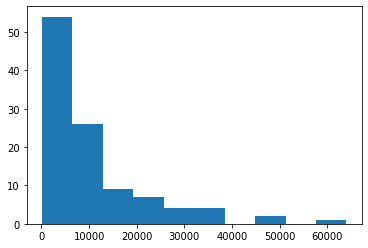

In [99]:
plt.hist(nyColleges.total_applied)

(array([51., 25., 18.,  3.,  4.,  4.,  1.,  0.,  0.,  1.]),
 array([  99. ,  691.3, 1283.6, 1875.9, 2468.2, 3060.5, 3652.8, 4245.1,
        4837.4, 5429.7, 6022. ]),
 <a list of 10 Patch objects>)

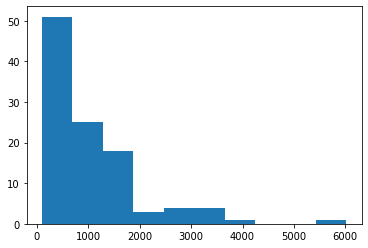

In [100]:
plt.hist(nyColleges.number_enrolled_total)

(array([ 3.,  4.,  3., 12., 10., 14., 24., 20.,  8.,  9.]),
 array([ 6.6 , 15.78, 24.96, 34.14, 43.32, 52.5 , 61.68, 70.86, 80.04,
        89.22, 98.4 ]),
 <a list of 10 Patch objects>)

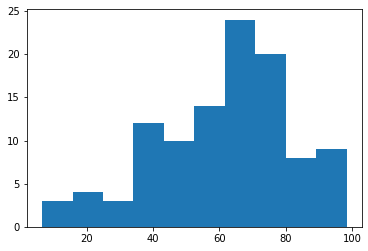

In [101]:
plt.hist(nyColleges.pct_admitted_total)

(array([ 3.,  3.,  5.,  5., 19., 15., 19., 21., 13.,  9.]),
 array([14.1 , 22.25, 30.4 , 38.55, 46.7 , 54.85, 63.  , 71.15, 79.3 ,
        87.45, 95.6 ]),
 <a list of 10 Patch objects>)

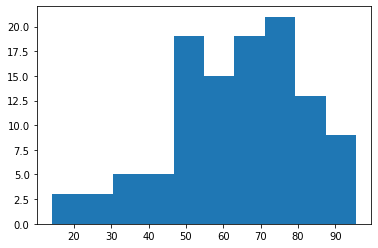

In [102]:
plt.hist(nyColleges.female_completion_rate_150pct)

(array([ 3.,  3.,  4., 14., 17., 17., 20., 17., 12.,  6.]),
 array([ 8.1 , 16.71, 25.32, 33.93, 42.54, 51.15, 59.76, 68.37, 76.98,
        85.59, 94.2 ]),
 <a list of 10 Patch objects>)

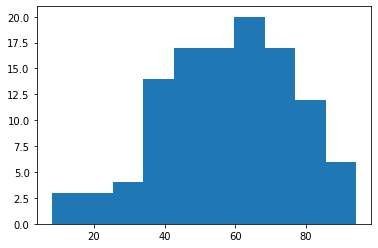

In [103]:
plt.hist(nyColleges.male_completion_rate_150pct)

(array([ 3.,  2.,  7.,  7., 18., 18., 17., 21., 14.,  7.]),
 array([12.3 , 20.53, 28.76, 36.99, 45.22, 53.45, 61.68, 69.91, 78.14,
        86.37, 94.6 ]),
 <a list of 10 Patch objects>)

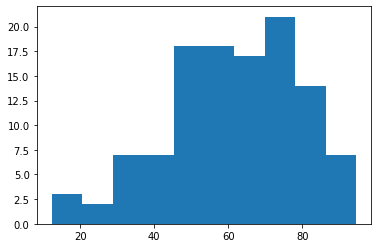

In [104]:
plt.hist(nyColleges.completion_rate_150pct)

In [105]:
nyColleges.completion_rate_150pct.describe()

count    114.000000
mean      61.424561
std       18.052380
min       12.300000
25%       49.650000
50%       63.200000
75%       73.750000
max       94.600000
Name: completion_rate_150pct, dtype: float64